In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
from optimizer import Adam
from CNN import Three_ConvNet
from keras.preprocessing.image import ImageDataGenerator

## train データを取得

In [49]:
train_data = np.load("/Users/eguchikazuki/skillupAI/Deep_Learning/DAY1/4_kadai/1_data/train_data.npy")
train_label = np.load("/Users/eguchikazuki/skillupAI/Deep_Learning/DAY1/4_kadai/1_data/train_label.npy")

## 正規化

In [50]:
# 正規化
train_data = (train_data - train_data.min()) / train_data.max()
train_data = train_data.astype('float32')

In [51]:
# 配列形式変更
train_data = train_data.reshape(-1, 28*28)

## ミニバッチ学習

In [52]:
epochs = 10
batch_size = 32
lr = 0.01
loop = 3

optimizer = Adam()

# CNNのオブジェクト生成
snet = Three_ConvNet(input_dim=(1, 28, 28),
                     conv_param={'filter_size':3, 'pad':1, 'stride':1},
                     pool_param={'pool_size':2, 'pad':0, 'stride':2},filter_num_list=[32,64,64],
                     hidden_size=100, output_size=15, weight_init_std=0.01)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

#データ拡張に使う
datagen = ImageDataGenerator(rotation_range = 20, height_shift_range = 0.1,width_shift_range = 0.1,zoom_range= 0.1)

for i in range(loop):
    train, test, train_labels, test_labels = train_test_split(train_data, train_label, test_size=0.3,shuffle=True) 
    train = train.reshape(-1, 1, 28, 28)
    test = test.reshape(-1, 1, 28, 28)
    x = train
    t = train_labels
    x = x.reshape(-1,1,28,28) # 配列形式の変形

    # 繰り返し回数
    xsize = x.shape[0]
    iter_num = np.ceil(xsize / batch_size).astype(np.int)

    x = x.reshape(-1,1,28,28) # 配列形式の変形
    for epoch in range(epochs):
        print("epoch=%s"%epoch)

        # シャッフル
        idx = np.arange(xsize)
        np.random.shuffle(idx)

        for it in range(iter_num):
            """
            ランダムなミニバッチを順番に取り出す
            """
            print("it=", it)
            mask = idx[batch_size*it : batch_size*(it+1)]

            # ミニバッチの生成
            x_train = x[mask]
            t_train = t[mask]

            g = datagen.flow(x_train, batch_size = batch_size,shuffle=False)
            batches = g.next()

            # 勾配の計算 (誤差逆伝播法を用いる) 
            grads = snet.gradient(batches, t_train)

            # 更新
            optimizer.update(snet.params, grads)

        ## 学習経過の記録

        # 訓練データにおけるloss
        #     print("calculating train_loss")    
        train_loss.append(snet.loss(x,  t))

        #     print("calculating test_loss")
        # テストデータにおけるloss
        test_loss.append(snet.loss(test, test_labels))

        #     print("calculating train_accuracy")
        # 訓練データにて精度を確認
        train_accuracy.append(snet.accuracy(x, t))
    
        #     print("calculating test_accuracy")
        # テストデータにて精度を算出
        test_accuracy.append(snet.accuracy(test, test_labels))

epoch=0
it= 0


/Users/eguchikazuki/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (32, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65


/Users/eguchikazuki/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (20, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


epoch=1
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
epoch=2
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
epoch=3
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 1

it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
epoch=9
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
epoch=0
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it=

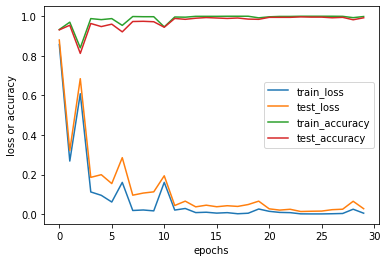

In [53]:
# lossのグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss,
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
df_log.plot()
plt.ylabel("loss or accuracy")
plt.xlabel("epochs")
plt.show()

In [54]:
print(test_accuracy)

[0.9311111111111111, 0.9544444444444444, 0.8122222222222222, 0.9633333333333334, 0.9477777777777778, 0.96, 0.9211111111111111, 0.9733333333333334, 0.9744444444444444, 0.9722222222222222, 0.9444444444444444, 0.9888888888888889, 0.9844444444444445, 0.99, 0.9933333333333333, 0.9911111111111112, 0.9888888888888889, 0.9911111111111112, 0.9855555555555555, 0.9844444444444445, 0.9944444444444445, 0.9944444444444445, 0.9944444444444445, 0.9966666666666667, 0.9955555555555555, 0.9955555555555555, 0.9922222222222222, 0.9944444444444445, 0.9822222222222222, 0.9922222222222222]


In [55]:
with open("katakana_model_Eguchi.pickle", "wb") as f:
    pickle.dump(snet, f)